In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from tabulate import tabulate

## Ejercicio 1: Estimacion EASY (sin distribucion)

Se analizaron 12 piezas de pan blanco de cierta marca elegidas al azar. Se determin ́o el porcentaje de carbohidratos contenido en cada una de las piezas, obteniendose los siguientes valores:

- 76.93 76.88 77.07 76.68 76.39 75.09 77.67 76.88 78.15 76.50 77.16 76.42

[1.a] Estimar la esperanza del porcentaje de carbohidratos contenido en una pieza de pan de esta marca.

$E(X) \approx \sum_{i=1}^n X_i/n$

In [3]:
muestra = np.array([76.93, 76.88, 77.07, 76.68, 76.39, 75.09, 77.67, 76.88, 78.15, 76.50, 77.16, 76.42])
muestra.mean()

76.81833333333333

[1.b] Estimar la mediana del porcentaje de carbohidratos contenido en una pieza de pan de esta marca.

$Med(X) \approx \frac{x^{(k)} + x^{(k+1)}}{2}$, con $k=2n$ y $n=len(muestra)=12$

In [4]:
np.median(muestra)

76.88

[1.c] Estimar la probabilidad de que el porcentaje de carbohidratos de una pieza de pan de esta marca no exceda el 76.5%.

$P(X < 76,5) \approx \frac{len[X < 76,5]}{len[X]}$

In [5]:
esMenor = lambda x: (x <= 76.5 and 1) or 0
menores = list(filter(esMenor, muestra.flatten()))

P = len(menores) / len(muestra)
P 

0.3333333333333333

## Ejercicio 2: Estimadores de una normal

Sea $X_1,...,X_n$ una muestra aleatoria de una distribucion $N(μ,σ^2)$. 

Obtener los estimadores de maxima verosimilitud (MV) de...

[2.a] $μ$, siendo $σ^2 = σ_0^2$ conocida.

> Sea  $L(\theta)$ la funcion de verosimilitud para la muestra $X$:<br>
> $L(\mu, \sigma) = \prod_{i=1}^n \frac{1}{\sqrt {2\pi} \theta} exp(-\frac{1}{2}(\frac{X_i - \mu}{\sigma})^2)$
$= (\frac{1}{\sqrt(2\pi)\sigma})^n e^{-\frac{1}{2}\sum_{i=1}^n (\frac{x_i - \mu}{\sigma})^2}$ <br>
> Sea $l(\theta) = ln(L(\theta)) = n ln(\frac{1}{\sqrt(2\pi)\sigma}) - \frac{1}{2} \sum_{i=1}^n (\frac{X_i - \mu}{\sigma})^2 $ <br>
> Veo $\frac{\partial}{\partial \mu} l(\theta) = \frac{1}{\theta^2} \sum_{i=1}^{n} X_i - \frac{n\mu}{\theta^2} = 0$
$\leftrightarrow \mu = \frac{\sum_{i=1}^n X_i}{n}$
> Entonces $\hat \mu_{MV} = \frac{\sum_{i=1}^n X_i}{n}$

[2.b] $σ^2$, siendo $μ = μ_0$ conocida.

> Dijimos que $l(\mu, \theta) = nln(1) - nln(\sqrt{2\pi}) - nln(\theta)-\frac{1}{2}\sum_{i=1}^n (\frac{X_i - \mu}{\sigma})^2$; <br>
> Luego ahora optimizo la eleccion de $\theta$ para maximizar $l(\mu, \theta)$: <br>
> Veo $\frac{\partial}{\partial \theta} l(\theta) = -\frac{n}{\theta} + \frac{1}{\theta^3} \sum_{i=1}^n (X_i - \mu)^2 = 0 \leftrightarrow -n\theta^2 + \sum_{i=1}^n (X_i - \mu)^2 = 0$ <br>
> $\rightarrow \theta_{MV}^2 = \frac{1}{n} \sum_{i=1}^n (X_i - \mu)^2$ 

[2.c] el par (μ,σ2) simultaneamente

(Pasar del cuaderno)

## Ejercicio 3: Estimadores de Normal

[3.a]

Una maquina envasa caramelos, siendo el peso neto (en gramos) de cada bolsa una v.a. con distribucion normal. Los siguientes datos corresponden al peso de 15 bolsas elegidas al azar:

* $210, 197, 187, 217, 194, 208, 220, 199, 193, 203, 181, 212, 188, 196, 185$

Usando el metodo de MV, indique el valor estimado de la media y la varianza del peso neto de cada bolsa de caramelos envasada por esta maquina.

In [6]:
def estimador_media(muestra:np.array) -> float:
    return muestra.mean()

def estimador_varianza(muestra:np.array, mu:float) -> float:
    n:int = len(muestra)
    return sum([((x-mu)**2)/n for x in muestra.flatten()])

In [7]:
muestra = np.array([210, 197, 187, 217, 194, 208, 220, 199, 193, 203, 181, 212, 188, 196, 185])

media_estimada = estimador_media(muestra)
var_estimada = estimador_varianza(muestra, media_estimada) 

print("Media estimada: ", media_estimada)
print("Varianza estimada: ", var_estimada)

Media estimada:  199.33333333333334
Varianza estimada:  133.95555555555558


[3.b] 

Con cierto instrumento se realizan 20 mediciones de una magnitud fısica $μ$. Cada observacion es de la forma $X = μ+\epsilon$, donde $\epsilon$ es el error de medicion (aleatorio).
Se obtuvieron los siguientes valores:

* $25.11, 25.02, 25.16, 24.98, 24.83, 25.05, 24.94, 25.04, 24.99, 24.96, 25.03, 24.97, 24.93, 25.12, 25.01, 25.12, 24.90, 24.98, 25.10, 24.96$

Suponiendo que los errores de medicion tienen distribucion normal con media cero y varianza 0.01, estimar $μ$. ¿Cual es la varianza del estimador de $μ$?

<u>Solucion:</u> 

La idea es que $X_i = \mu + \epsilon_i$ y $\epsilon$ ~ $N(0, 0.01) \rightarrow X$ ~ $N(\mu, 0.01)$

Entonces, estimar $\mu$ equivale a estimar la media de $X$ que es una normal, entonces vale lo visto en [2]...

Sea $X$ ~ $N(\mu, \sigma^2)$ el estimador de $\mu$ por maxima verosimilitud, dada una muestra de $n$ elementos es:
> $\hat \mu_{MV} = \bar X_n = \sum_{i=0}^n X_i/n$

Por lo tanto, en este caso queda $\hat \mu_{MV} = \bar X_{20} = \sum_{i=0}^{20} X_i/20$

In [8]:
muestra = np.array([25.11, 25.02, 25.16, 24.98, 24.83, 25.05, 24.94, 25.04, 24.99, 24.96, 25.03, 24.97, 24.93, 25.12, 25.01, 25.12, 24.90, 24.98, 25.10, 24.96])
muestra.mean()

25.009999999999998

Por otra parte, la varianza del estimador $\hat \mu_{MV}$ es...

$Var(\hat \mu_{MV}) = Var(\sum_{i=0}^n X_i/n) = n^{-2} Var(\sum_{i=0}^n X_i) = n^{-2} \sum_{i=1}^n Var(X_i) = 0.01 / n$

Como en este caso $n=20 \rightarrow Var(\hat \mu_{MV}) = 0.0005$

[3.c] 

Para conocer la precision de un sistema de medici ́on se mide 24 veces una magnitud conocida $μ_0 = 12$, obteni ́endose los siguientes valores

* ${12.51, 11.66, 11.91, 12.25, 11.54, 11.36, 12.4, 12.19, 12.88, 12.16, 12.69, 12.91, 12.12, 11.02, 12.53, 11.77, 12.72, 10.56, 11.52, 11.66, 12.25, 12.09, 11.48, 12.36}$

Estimar la precision (es decir, la varianza del error de medici ́on), suponiendo que los errores estan normalmente distribu ́ıdos con media cero).

<u>Solucion: </u>

Las mediciones son $X_i = \mu_0 + \epsilon_i \rightarrow \epsilon = X - \mu_0$

Tenemos que el error $\epsilon$ ~ $N(0, \sigma^2) \rightarrow$

> $\sigma_{MV}^2 = \frac{1}{n} \sum_{i=1}^n (X_i - \mu)^2$, demostrado en [2]

Por lo tanto, en este caso queda...

$\sigma_{MV}^2 = \frac{1}{24} \sum_{i=1}^{24} (X_i - \mu)^2$


In [13]:
muestra = [12.51, 11.66, 11.91, 12.25, 11.54, 11.36, 12.4, 12.19, 12.88, 12.16, 12.69,
           12.91, 12.12, 11.02, 12.53, 11.77, 12.72, 10.56, 11.52, 11.66, 12.25, 12.09,
           11.48, 12.36]

estimacion_varianza = 1/24 * sum([(x-12)**2 for x in muestra])
estimacion_varianza

0.33687500000000004

## Ejercicio 4 - Estimadores de Exponencial

Se sabe que el tiempo de duracion de una clase de lamparas tiene distribucion $\epsilon(θ)$. Consideremos el siguiente experimento. Se seleccionan $n$ lamparas al azar y se registran sus tiempos de duracion: $X_1,...,X_n$.



[4.a] Calcular el estimador de momentos y de MV de θ y del percentil 90 (o cuantil 0.9) del tiempo de duracion de una lampara bajo el modelo propuesto.

[i] Por Maxima Verosimilitud (MV)... 
> Sea $L(\theta)$ la funcion de verosimilitud para la muestra $X$:<br>
> $L(\theta) = \prod_{i=1}^n \theta e^{-\theta X_i} I_{(0, +inf)}(X_i)$
$= \theta^n e^{-\theta \sum_{i=1}^{n} X_i} \prod_{i=1}^n I_{(0, +inf)}(X_i)$ <br>
> Sea $l(\theta) = ln(L(\theta)) =  nln(\theta) - \theta \sum_{i=1}^{n} X_i + g(X)$ <br>
> Veo $\frac{\partial}{\partial \theta} l(\theta) = \frac{n}{\theta} - \sum_{i=1}^{n} X_i = 0$
$\leftrightarrow n - \theta \sum_{i=1}^{n} X_i = 0$
> Entonces despejando queda $\hat \theta_{MV} = \frac{n}{\sum_{i=1}^{n} X_i} = \frac{1}{\bar X_n}$

[ii] Por Momentos... 
> $E(X) = \bar X_n = \sum_{i=1}^{n} X_i / n$<br>
> Pero $E(X) = 1/\theta$ porque $X$ ~ $\epsilon(\theta)$<br>
> Entonces  $\hat \theta_{M} = \frac{n}{\sum_{i=1}^{n} X_i} = \frac{1}{\bar X_n}$

[iii] Luego $F_X^{-1}(0.9)$ viene de usar el estimador de $\theta$ en la densidad.

[4.b] Decidir si estos estimadores son insesgados o asintoticamente insesgados.

* Un estimador $\hat \lambda$ es sesgado si $bias(\hat \lambda) = E(\hat \lambda) - \lambda \neq 0$
* Luego...

[4.c] Decidir si estos estimadores son consistentes. Justificar.

> Un estimador $\hat \lambda$ es consistente sii $(\lim n \rightarrow inf): $ <br>
> $\hat E(\lambda_n) \rightarrow \lambda$ ^ $Var(\hat \lambda_n) \rightarrow 0$<br>
> Luego en este caso, ambos estimadores $\hat \theta$ quedaron iguales $\rightarrow$ <br>
> $(\lim n \rightarrow inf): \hat \theta_n = \frac{1}{\sum_{i=1}^n X_i/n} = \frac{1}{\bar X_n} \rightarrow 1 / E(X)$ <br>
> Como $X$ ~ $Exponencial(\theta) \rightarrow E(X) = 1/\theta$, entonces <br>
> $(\lim n \rightarrow inf): \hat \theta_n = \frac{1}{\bar X_n} \rightarrow 1 / E(X) = \frac{1}{1/\theta} = \theta$ <br>
> Concluyo, son estimadores consistentes.


[4.d] Se han probado 20 lamparas, obteniendose los siguientes tiempos de duracion (en dıas):

* 39.08 45.27 26.27 14.77 65.84 49.64 0.80 66.58 69.60 32.42 228.36 64.79 9.38 3.86 37.18 104.75 3.64 104.19 8.17 8.36

    - i. Basandose en estas observaciones, estime $θ$ y el percentil 90 (o cuantil 0.9) del tiempo de duracion de una lampara bajo el modelo propuesto usando los estimadores hallados en el ıtem (a).

    - ii. ¿Como harıa para estimar el percentil solicitado si no conociera la distribucion de las $X_i$?

[4.e] En un nuevo experimento se registra la duracion de 350 lamparas. Los valores observados se encuentran en el archivo lamparas2.txt. Repita el  ́ıtem (d) para este nuevo conjunto de datos.

## Ejercicio 5 - Estimadores de Poisson

El numero de llamadas que recibe una central telefonica en un dia es una variable aleatoria con distribucion $P(θ)$ ($X$ ~ $P(\theta)$). Se desea estimar la probabilidad de que en un determinado dia se reciban exactamante 40 llamadas. Para ello se registraran la cantidad de llamadas recibidas durante 48 dias.



[5.a] Basandose en la muestra aleatoria $X_1, . . . , X_n$, hallar el estimador de momentos y de maxima verosimilitud de $θ$.

[i] Por Maxima Verosimilitud (MV)... 
> Sea  $L(\theta)$ la funcion de verosimilitud para la muestra $X$:<br>
> $L(\theta) = \prod_{i=1}^n \frac{\theta^X_i}{X_i!}e^{-\theta}$
$= e^{-n\theta}\theta^{\sum_{i=1}^{n} X_i} \prod_{i=1}^n \frac{1}{X_i!}$ <br>
> Sea $l(\theta) = ln(L(\theta)) =  -n\theta + \sum_{i=1}^n X_i ln(\theta) - \sum_{i=1}^n ln (X_i)$ <br>
> Veo $\frac{\partial}{\partial \theta} l(\theta) = -n + \frac{1}{\theta}\sum_{i=1}^n X_i = 0$ 
$\leftrightarrow -n \theta + \sum_{i=1}^n X_i = 0$<br>
> Entonces $\hat \theta_{MV} = \sum_{i=1}^n X_i / n = \bar X_n$

[ii] Por Momentos... 
> $E(X) = \bar X_n$ <br>
> Como $X$ ~ $P(\theta) \rightarrow E(X) = \theta$ <br>
> Luego, al igual que por MV.. <br>
> $\hat \theta_M = \bar X_n$ 

[5.b] Deducir un estimador para la probabilidad de que en un determinado dIa se reciban 40 llamadas.

* Usando $\hat \theta = \bar X_n$, 

* $P(X = 40) = F_x(40) = \frac{(\hat \theta)^{40}}{40!}e^{-\hat \theta}$

[5.c] ¿Como haria para estimar la probabilidad deseada si no conociera la distribucion de las Xi?

$P(x=40) =$ #{$X_i \in X: X_i = 40$ } / #{$X$}
 

## Ejercicio 6: Distribucion desconocida 

Se sabe que la longitud de los ejes que fabrica un establecimiento siderurgico tiene densidad:

* $f(x;\theta) = \frac{1}{\theta} x^{(\frac{1}{\theta}-1)}I_{(0,1)}(x)$


[6.a] Hallar el estimador de MV y el estimador de momentos

Por Maxima Verosimilitud... 
> Sea  $L(\theta)$ la funcion de verosimilitud para la muestra $X$:<br>
> $L(\theta) = \prod_{i=1}^n \frac{1}{\theta} x^{(\frac{1}{\theta}-1)}I_{(0,1)}(x)$
$=\theta^{-n} \prod_{i=1}^n X_i^{(\frac{1}{\theta} - 1)} I_{(0,1)}(x)$ <br>
> Sea $l(\theta) = ln(L(\theta)) = -nln(\theta) + (\frac{1}{\theta}-1) \sum_{x=1}^n ln(X_i) g(x_i)$ <br>
> Veo $\frac{\partial}{\partial \theta} l(\theta) = -\frac{n}{\theta} - \frac{1}{\theta^2} \sum_{i=1}^n ln(X_i) = 0$
$\leftrightarrow - n \theta - \sum_{i=1}^n ln(X_i) = 0$ <br>
> Entonces $\hat \theta_{MV} = \frac{-\sum_{i=1}^n ln(X_i)}{n}$

Por Momentos...
> $E(X) = \hat X_n$ <br>
> En este caso, <br>
> $E(X) = \int_0^1 x \frac{1}{\theta} x^{(\frac{1}{\theta}-1)} dx$
> $= \frac{1}{\theta}\int_0^1 x^{\frac{1}{\theta}} dx = \frac{1}{\theta+1}$<br>
> Por lo tanto, <br>
> $E(X) = \hat X_n \rightarrow \frac{1}{\theta+1} = \hat X_n$<br>
> $\leftrightarrow \hat \theta_M = \frac{1}{\hat X_n} -1$

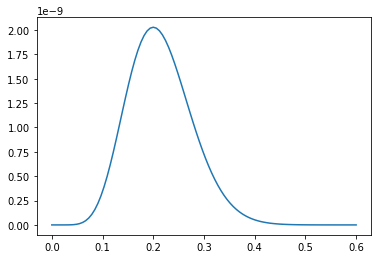

In [8]:
def pp(theta:float) -> float:
    x:list = [3,8,9,6,4,5,3,2]
    out:float = 1
    for k in x:
        out *= theta*(1-theta)**(k-1)
    return out

X = np.linspace(0,0.6,100)
Y = [pp(x) for x in X]

plt.plot(X,Y)

In [16]:
(-8) / (-8 -8 * (8+3)/2) 

0.15384615384615385